
<div align="center">

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangtgao/DS-UA_201-Causal-Inference-Spring-2025/blob/main/labs/9-Control_Variables.ipynb)

</div>






$$
\begin{array}{c}
\textbf{CAUSAL INFERENCE}\\\\
\textbf{Zichao Zhang} \\
\textit{Center for Data Science, New York University} \\\\
\textit{Oct 31, 2025}\\\\\\
\text{Materials prepared by: Daniela Pinto Veizaga, Xiang Pan, Xiang Gao, and Zichao Zhang}
\end{array}
$$

---

## Control Variables

If the data-generating processes were not naturally randomizing treatment, we can seek to adjust the population in the treatment and control groups.

One adjustment method is through controlling or conditioning on other factors $C$ such that

\begin{equation}
S \perp U \ | \ C
\end{equation}

In this case, we can say that $S$ and $U$ are **conditionally independent** given $C$.

### Independence Recap

Independence plays a central role in our arguments for the identification of causal parameters.

$$
P(X \in A, Y \in B) = P(X \in A)P(Y \in B)
$$

Also,

$$
P(Y|X) = P(Y) \ \ \text{and} \ \ P(X|Y) = P(X)
$$

If two variables are independent, then knowing the value of one variable does not provide additional information about the other.

Also, independent variables have a covariance of 0 and are, therefore, uncorrelated.
- Proof in lecture slides by showing $E[XY]=E[X]E[Y]$

We've seen that independence implies 0 covariance and uncorrelatedness.

However, the converse statement is false. Independence is not necessary for uncorrelatedness.

### Conditional Independence

$$
P(X \in A, Y \in B | Z) = P(X \in A|Z)P(Y \in B|Z)
$$

Also,

$$
P(Y|X, Z) = P(Y|Z) \ \ \text{and} \ \ P(X|Y, Z) = P(X | Z)
$$

$X$ and $Y$ have no relationship if we account for the value taken by some other variable $Z$. For example, knowing $X$, if we already know $Z$, this does not influence our estimate of $Y$.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [3]:
# simulate independent random variables
np.random.seed(201)
X_ind = np.random.randint(1, 7, 1000)  # Roll of die 1
Y_ind = np.random.randint(1, 7, 1000)  # Roll of die 2

# calculate covariance of independent variables
cov_ind = np.cov(X_ind, Y_ind)[0, 1]
print(f"Covariance of independent variables: {cov_ind}")

# simulate dependent variables
X_dep = np.random.randint(1, 10, 1000)
Y_dep = 2 * X_dep + np.random.normal(0, 1, 1000)
Z_dep = 2 * X_dep + np.random.normal(0, 1, 1000)

# calculate covariance of dependent variables
cov_dep = np.cov(Y_dep, Z_dep)[0, 1]
print(f"Covariance of dependent variables Y and Z: {cov_dep}")

# calculate covariance of dependent variables condition on X
for X_value in range(1, 10):
  cov_dep = np.cov(Y_dep[X_dep==X_value], Z_dep[X_dep==X_value])[0, 1]
  print(f"Covariance of dependent variables Y and Z condition on X = {X_value}: {cov_dep}")

Covariance of independent variables: -0.09712712712712727
Covariance of dependent variables Y and Z: 25.55082953533942
Covariance of dependent variables Y and Z condition on X = 1: -0.16950780028113066
Covariance of dependent variables Y and Z condition on X = 2: -0.2008651282600672
Covariance of dependent variables Y and Z condition on X = 3: -0.039116306498144265
Covariance of dependent variables Y and Z condition on X = 4: 0.12289574759251388
Covariance of dependent variables Y and Z condition on X = 5: -0.021864156396484553
Covariance of dependent variables Y and Z condition on X = 6: -0.022540072239564873
Covariance of dependent variables Y and Z condition on X = 7: -0.051055281115317146
Covariance of dependent variables Y and Z condition on X = 8: -0.1343325234297629
Covariance of dependent variables Y and Z condition on X = 9: -0.09652086587770842


Graphically, what does conditional independence look like?

![Indep](https://www.cs.cmu.edu/~15281-f23/coursenotes/bayesnets/images/bayes_ball.png)

For more intuitive examples, feel free to check out https://www.andrew.cmu.edu/user/scheines/tutor/d-sep.html

### Revisiting -  Revisiting All Causes Model

We have actually covered control variables in Lab 3 if you remember.

Let's review some old concepts and revisit the example again with our new knowledge on regression and experiments.

#### Definition

All causes model:

$$Y(S, U)$$

where $Y$ is the outcome, $S$ is the state of the world, and $U$ is other factors we observe that influence $Y$.

Also, for simplicity, consider $S$ as a binary treatment variable (0 or 1).

Causal quantities of interest:

$$
\begin{align}
\text{ATE} &= E[Y(S=1, U) - Y(S=0, U)]\\
\text{ATT} &= E[Y(S=1, U) - Y(S=0, U)|S=1]\\
\text{ATU} &= E[Y(S=1, U) - Y(S=0, U)|S=0]
\end{align}
$$

**Fundamental problem of causal inference**: we only get to see one of $Y(S=1, U)$ and $Y(S=0, U)$.

Identification is the process where we reduce these equations involving unobserved variables to observed data.

If we have $U \perp S$, then we can use descriptive variables to estimate the treatment effect.

#### Formal derivation

$$
Y(S, U) = \alpha_0 + \alpha_1 S + U
$$

Equivalent to:
$U \perp S | \emptyset$


If we have a non-empty set of control variables $C$, only by conditioning on $C$ we can make $U$ and $S$ independent.

$U \perp S | C$

We can have
$$
\mathbb{E}[U \mid S, C] = \mathbb{E}[U \mid C]
$$

$$
\begin{aligned}
V & \equiv U-E[U \mid S, C] \\
& =U-E[U \mid C] \\
& =U-\left(\gamma_0+\gamma_1 C\right)
\end{aligned}
$$

$$
U = V + \gamma_0 + \gamma_1 C
$$


$$
\begin{aligned}
Y(S, U) & = \alpha_0 + \alpha_1 S + V + \gamma_0 + \gamma_1 C \\
        & = (\alpha_0 + \gamma_0) + \alpha_1 S + \gamma_1 C + V \\
        & = \tilde{\alpha}_0 + \alpha_1 S + \tilde{\alpha}_2 C + V
\end{aligned}
$$

We peeled off the effect of $C$ from the $U$.




#### Conditional Independence Test

If we know that if we have $U \perp S | C$, and $U \mid C$ is linear, then we can use the control variables to estimate the treatment effect.

How should we test the assumption?

1. Regression: Regress $U$ on $S$ given $C$.

Given $C$, we can test if $\gamma_1$ is statistically different from 0.
$$
U = \gamma_0 + \gamma_1 S+ \gamma_2 C + \epsilon
$$


2. Partial Correlation (continuous)

$$
r_{X Y \mid Z}=\frac{r_{X Y}-r_{X Z} \cdot r_{Y Z}}{\sqrt{\left(1-r_{X Z}^2\right)\left(1-r_{Y Z}^2\right)}}
$$

If we have CI, then $r_{S U \mid C} = 0$.

High-dim continuous CI test is non-trivial.

In [12]:
# simulate dependent variables
X_dep = np.random.randint(1, 10, 1000)
Y_dep = 2 * X_dep + np.random.normal(0, 1, 1000)
Z_dep = 2 * X_dep + np.random.normal(0, 1, 1000)

# create datafrane
df = pd.DataFrame({
    'Y_dep': Y_dep,
    'X_dep': X_dep,
    'Z_dep': Z_dep
})

ols=sm.ols(formula='Y_dep~Z_dep', data=df).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_dep   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.503e+04
Date:                Thu, 03 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:39:22   Log-Likelihood:                -1737.5
No. Observations:                1000   AIC:                             3479.
Df Residuals:                     998   BIC:                             3489.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2066      0.089      2.314      0.021       0.031       0.382
Z_dep          0.9755      0.008    122.594      0.000       0.960       0.991
==============================================================================
Omnibus:                        1.847   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                1.820
Skew:                           0.025   Prob(JB):                        0.402
Kurtosis:                       3.203   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
ols=sm.ols(formula='Y_dep~Z_dep+X_dep', data=df).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_dep   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 1.529e+04
Date:                Thu, 03 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:39:40   Log-Likelihood:                -1397.8
No. Observations:                1000   AIC:                             2802.
Df Residuals:                     997   BIC:                             2816.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0469      0.064     -0.731      0.465      -0.173       0.079
Z_dep          0.0199      0.031      0.636      0.525      -0.041       0.081
X_dep          1.9671      0.063     31.140      0.000       1.843       2.091
==============================================================================
Omnibus:                        2.687   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.569
Skew:                          -0.094   Prob(JB):                        0.277
Kurtosis:                       3.162   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Simulation

Using the old example, we will show how computing only association based on observational data does not give us the true underlying causal effect, and how *control variables* can help us identify these parameters.

- $Y$ is continuous income.
- $S$ is binary college status. (1 = went to college)
- $U$ is binary family status. (1 = wealthy family)

We can see that the true causal effect from college status to income of people will be confounded by the third variable on family status as it is a common cause of both the treatment and outcome, i.e., a wealthy family leads to higher income and more likely to go to college.

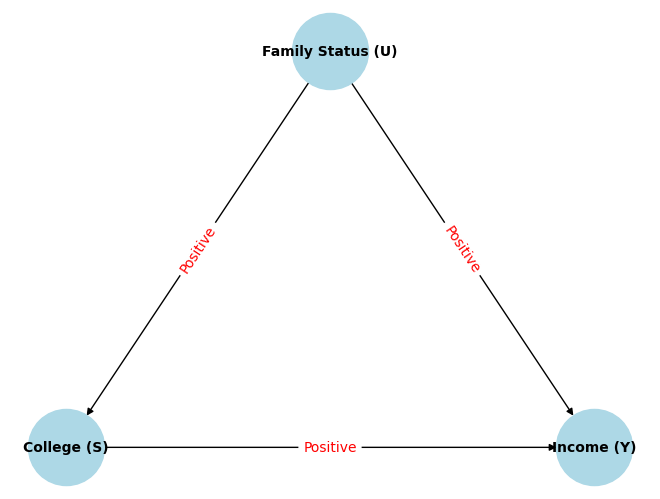

In [4]:
import networkx as nx
import matplotlib.pyplot as plt


# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Family Status (U)")
G.add_node("College (S)")
G.add_node("Income (Y)")

# Add directed edges representing causal relationships
G.add_edge("Family Status (U)", "College (S)")
G.add_edge("Family Status (U)", "Income (Y)")
G.add_edge("College (S)", "Income (Y)")

# Draw the graph
pos = {
    "Family Status (U)": (0, 1),
    "College (S)": (-1, 0),
    "Income (Y)": (1, 0),
}

labels = {
    ("Family Status (U)", "College (S)"): "Positive",
    ("Family Status (U)", "Income (Y)"): "Positive",
    ("College (S)", "Income (Y)"): "Positive",
}

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color="red")
plt.show()

Now, let's generate some sythetic data corresponding to this data generative process.

In [5]:
# Step 1: Simulate family status (rich=1, poor=0)
np.random.seed(42)
n = 1000
family_status = np.random.binomial(1, 0.4, n)  # 40% rich, 60% poor

# Step 2: Simulate college attendance based on family status (rich more likely to attend college)
college = np.random.binomial(1, 0.7 * family_status + 0.3 * (1 - family_status), n)

# Step 3: Simulate income based on family status and college attendance

noise = np.random.normal(0, 5000, n)  # Noise to add to income
income_observe = (50000 + 30000 * college + 20000 * family_status + noise)
income_college = (50000 + 30000 * 1 + 20000 * family_status + noise)

# For people who went to college (treated group), compared to the untreated,
# they would have higher income in the counterfactual world where they did not go to college
income_no_college = (50000 + 30000 * 0 + 10000 * college + 20000 * family_status + noise)

# Create a DataFrame for clarity
df = pd.DataFrame({
    'Family_Status': family_status,  # 1 = rich, 0 = poor
    'College': college,  # 1 = went to college, 0 = did not go to college
    'Income_Observe': income_observe,
    'Income_College': income_college,
    'Income_No_College': income_no_college
})

We can calculate the true ATE, ATT, and ATU based on the perfect knowledge we have on the observed and conuterfactual outcomes.

In [6]:
# Step 4: Compute ATE, ATT, ATU
# TRUE ATE:
ATE = df['Income_College'].mean() - df['Income_No_College'].mean()

# ATT:
ATT = df[(df['College'] == 1)]['Income_College'].mean() - df[(df['College'] == 1)]['Income_No_College'].mean()

# ATU:
ATU = df[(df['College'] == 0)]['Income_College'].mean() - df[(df['College'] == 0)]['Income_No_College'].mean()

# Print the results
print(f"TRUE Average Treatment Effect (ATE): {ATE:.2f}")
print(f"TRUE Average Treatment Effect on the Treated (ATT): {ATT:.2f}")
print(f"TRUE Average Treatment Effect on the Untreated (ATU): {ATU:.2f}")

TRUE Average Treatment Effect (ATE): 25560.00
TRUE Average Treatment Effect on the Treated (ATT): 20000.00
TRUE Average Treatment Effect on the Untreated (ATU): 30000.00


What happens if we only have access to the observed treatment and outcome with hidden confounding?

In [7]:
# Step 5: Compute association by conditioning
# Biased ATE using only what was obserevd:
Association = df[df['College'] == 1]['Income_Observe'].mean() - df[df['College'] == 0]['Income_Observe'].mean()

# Print the results
print(f"Biased Average Treatment Effect (ATE): {Association:.2f}")

Biased Average Treatment Effect (ATE): 37639.89


If we have access to potential confounders, we can condition them. Conditional independence helps us here to establish the assumption.

In [8]:
# Step 6: Condition on confounder - family status

Association = df[(df['College'] == 1) & (df['Family_Status'] == 1)]['Income_Observe'].mean() - df[(df['College'] == 0) & (df['Family_Status'] == 1)]['Income_Observe'].mean()

# Print the results
print(f"Association for those with family_status = 1: {Association:.2f}")

Association = df[(df['College'] == 1) & (df['Family_Status'] == 0)]['Income_Observe'].mean() - df[(df['College'] == 0) & (df['Family_Status'] == 0)]['Income_Observe'].mean()

# Print the results
print(f"Association for those with family_status = 0: {Association:.2f}")

Association for those with family_status = 1: 30553.75
Association for those with family_status = 0: 30308.08


Without adding the confounder to our regression setup, the result is biased similar to the conditional expectation without conditioning on the confounder.

In [9]:
import statsmodels.formula.api as sm

ols=sm.ols(formula='Income_Observe~College', data=df).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Income_Observe   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     3357.
Date:                Thu, 03 Apr 2025   Prob (F-statistic):          1.55e-321
Time:                        20:36:40   Log-Likelihood:                -10649.
No. Observations:                1000   AIC:                         2.130e+04
Df Residuals:                     998   BIC:                         2.131e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.441e+04    432.902    125.692      0.000    5.36e+04    5.53e+04
College     3.764e+04    649.679     57.936      0.000    3.64e+04    3.89e+04
==============================================================================
Omnibus:                       72.502   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.972
Skew:                           0.209   Prob(JB):                     1.88e-07
Kurtosis:                       2.246   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can only identify it by adding the confounder to establish conditional independence.

In [10]:
ols=sm.ols(formula='Income_Observe~College+Family_Status', data=df).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Income_Observe   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     8981.
Date:                Thu, 03 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:36:48   Log-Likelihood:                -9912.8
No. Observations:                1000   AIC:                         1.983e+04
Df Residuals:                     997   BIC:                         1.985e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.996e+04    221.278    225.780      0.000    4.95e+04    5.04e+04
College        3.041e+04    335.519     90.623      0.000    2.97e+04    3.11e+04
Family_Status   1.98e+04    342.263     57.864      0.000    1.91e+04    2.05e+04
==============================================================================
Omnibus:                        1.170   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                1.054
Skew:                           0.025   Prob(JB):                        0.590
Kurtosis:                       3.151   Cond. No.                         3.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Other Miscellaneous Points



*   Kitchen-sink regression?
*   Estimation?
*   Identifying Assumptions?

